# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [1]:
import numpy as np
import cv2
import dlib
import math
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

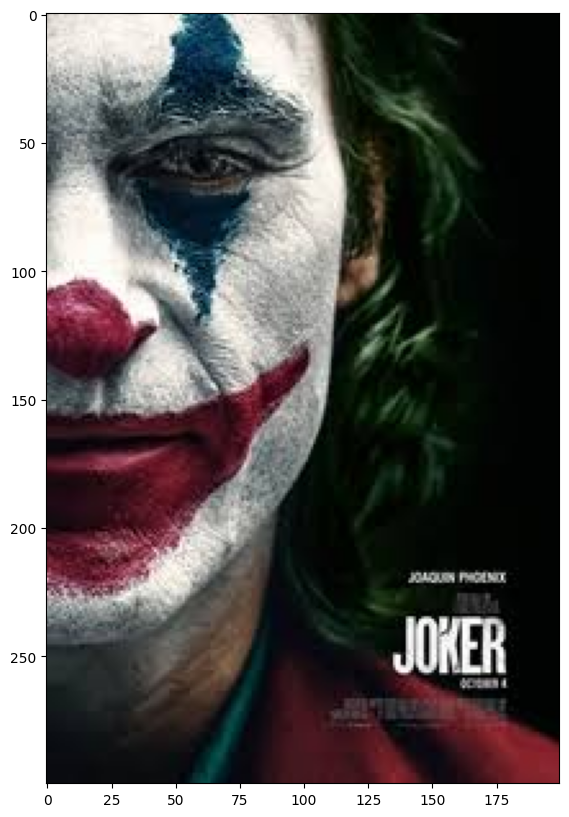

In [2]:
# loading image
img = cv2.imread('data/simple-joker.jpeg')

# converting to RGB since OPENCV by default is using BGR color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [3]:
# creating dlib frontal face detector
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [4]:
# apply face detector to image
# 1 is upsamping factor. By default, according to code http://dlib.net/face_detection_ex.cpp.html detector looks for faces 80x80 pixels or larger.
# If smaller face detection size is needed, need to use other factor. For example, for detecting faces at least 40x40 pixels, need to use factor of 2. 
rects = detector(img, 1)

print('Number of detected faces:', len(rects))
print(rects)

# convenience function to convert rect from dlib to convenient format for openCV to draw rectangle
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

# function for generating random RGB color for face rectangles
def random_color():
    r = int(np.random.uniform(0,255))
    g = int(np.random.uniform(0,255))
    b = int(np.random.uniform(0,255))
    return (r,g,b)


Number of detected faces: 0
rectangles[]


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

(<matplotlib.image.AxesImage at 0x14e45f8d0>, Text(0.5, 1.0, 'dlib'))

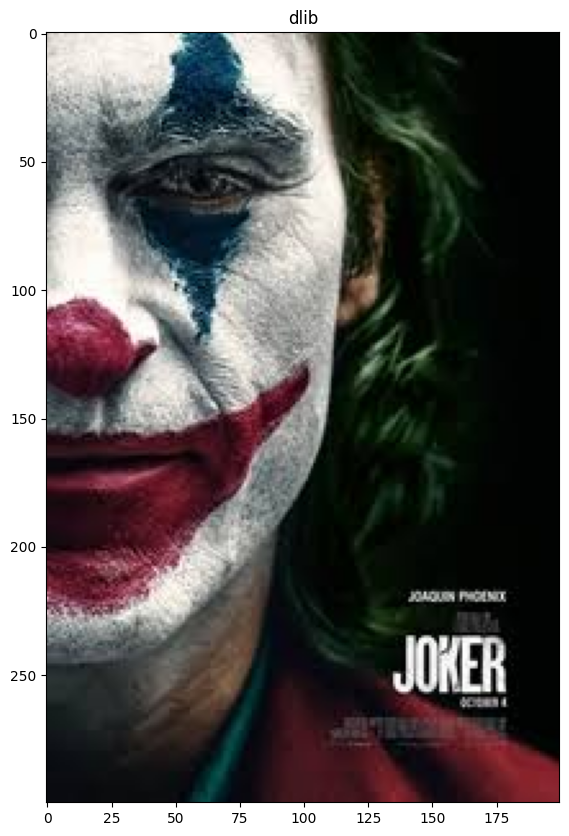

In [5]:
# Create copy of original image so we can compare
result_dlib = np.copy(img)
faces_dlib_img = []

for rect in rects:
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)

    color = random_color()

    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), color, 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])
    
plt.imshow(result_dlib), plt.title('dlib')

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

In [5]:
# video sources: web camera and two local video files
video_sources = [0,'data/big_buck_bunny.mp4', 'data/fordvferrari.mp4']

vid = cv2.VideoCapture(video_sources[0])

# Needed for MacOS, in other case window is not closed and destroyed later
cv2.startWindowThread()
  
while vid.isOpened():
    # Capture the video frame by frame
    success, frame = vid.read()

    # exit if frame cannot be read (usually this means end of the video) 
    if not success:
        break

    rects = detector(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), 1)
    
    # Draw rectangle around each face
    for rect in rects:            
        x, y, w, h = rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 3)        
    
    cv2.imshow('frame', frame)
    
    # The 'q' button is set as the quitting button
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

print("video finished")
# After the loop release the cap object and destroy all the windows
vid.release()
# On MacOS need to surround destroyAllWindows with waitKey so window will definitely destroy before end of execution
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

video finished


-1

: 

### How does the detector perform? Is it robust?

Yes, dlib is very robust face detector, it works well even with complications like bad illumination, glasses / helmets etc, it also detects faces with some rotations. 

| Image                         | Source | Comments |
|-------------------------------|--------|----------|
| ![Alt text](results/rabbit-face.png) |    video    |  Detects even faces of non existing creature :)        |
| ![Alt text](results/rabbit-face2.png) |    video    |  Detects even faces of non existing creature :)        |
| ![Alt text](results/video1.png) |    video    |  Face detection in poor lightening conditions        |
| ![Alt text](results/video2.png) |    video    |  Not frontal face detection        |
| ![Alt text](results/video3.png) |    video    |  Man with helmet face detection        |
| ![Alt text](results/video4.png) |    video    |  Multiple people faces detection, some people are in sunglasses        |
| ![Alt text](results/video5.png) |    video    |  Face detection of woman on distant background         |
| ![Alt text](results/video6.png) |    video    |  Face detection of man in hat and with sunglasses         |
| ![Alt text](results/video7.png) |    video    |  Face detection of man in helmet not frontal         |
| ![Alt text](results/web-camera.png) |    frontal camera    |  Not frontal face detection         |
| ![Alt text](results/web-camera3.png) |    frontal camera    |  Face detection with smile :)         |


### Limitations

| Image | Source | Comments |
|-------|--------|----------|
| ![Alt text](results/web-camera-limit.png) |    frontal camera    |  As you can see, there's a limit for face rotation angle         |
| ![Alt text](results/web-camera-limit2.png) |    frontal camera    |  Same as above         |
| ![Alt text](results/joker-result1.png) ![Alt text](results/joker-result2.png)      |   image     |  As you can see, here face is not fully in frame, dlib does not detect such faces        |